# 어느 역에서 가장 많이 지하철을 탈까?

In [1]:
# 판다스 라이브러리를 불러오겠습니다. 
import pandas as pd 

# 1. 준비한 자료 읽어오기

In [17]:
# 일자/역별 승객수 데이터를 읽어오겠습니다.  
raw = pd.read_excel('./data/subway_raw.xlsx')

In [18]:
raw.head()

,사용일자,요일,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자
0,20190101,화,경춘선,1323,가평,1520,1436,20190104
1,20190101,화,경춘선,1322,상천,275,114,20190104
2,20190101,화,경춘선,1321,청평,1509,1083,20190104
3,20190101,화,경춘선,1320,대성리,357,271,20190104
4,20190101,화,경춘선,1319,마석,1772,1963,20190104


In [19]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
사용일자      99342 non-null int64
요일        99342 non-null object
노선명       99342 non-null object
역ID       99342 non-null int64
역명        99342 non-null object
승차총승객수    99342 non-null int64
하차총승객수    99342 non-null int64
등록일자      99342 non-null int64
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


## Q) 가장 승객이 많이 타는 역은?? 

In [20]:
# 역명별 승객수 데이터를 살펴보겠습니다. 
data_station = raw.pivot_table(index = '역명', values = '승차총승객수', aggfunc='sum')
data_station = data_station.sort_values(by = '승차총승객수', ascending = False)
data_station.head(10)  # 승차승객수가 가장 많은 역 상위 10개

,승차총승객수
역명,
잠실(송파구청),17273668
강남,16833240
고속터미널,16295461
홍대입구,16018193
서울역,15952147
사당,12304165
신림,11881525
선릉,10725980
구로디지털단지,10577842


## Q) 노선별로 역별/요일별 승객수를 비교해볼 수 있을까?

In [33]:
# 하나의 노선(1호선) 데이터를 선택하여 역별/요일별 승객수 데이터를 정리하겠습니다. 

line = '1호선'
data_line = raw[raw['노선명'] == line]

# 피벗테이블: 노선의 역 순서에 맞춰 정리하기 위해 역ID도 인덱스에 포함하였습니다. 
df_pivot = data_line.pivot_table(index = ['역ID', '역명'], columns = '요일', values = '승차총승객수',aggfunc = 'sum') 
df_pivot = df_pivot[['월','화','수','목','금','토','일']]   # 컬럼 순서를 요일에 맞게 정리합니다. 
df_pivot = df_pivot / 10000  # 만명단위로 표현기 위해 데이터프레임 전체를 1만으로 나누었습니다. 
df_pivot

,요일,월,화,수,목,금,토,일
역ID,역명,,,,,,,
150,서울역,139.3534,145.0435,129.4993,146.4058,171.3426,130.5254,98.2663
151,시청,64.0200,71.3864,62.8091,70.3511,76.2319,50.9676,29.8211
152,종각,112.1870,119.7708,108.1454,120.9061,132.2916,86.4711,52.9500
153,종로3가,83.8255,87.3786,80.0413,89.9436,97.7886,88.0772,53.8763
154,종로5가,68.4973,72.1713,63.9769,72.8118,78.3878,68.7458,33.1649
155,동대문,35.6532,37.3526,32.9555,36.5131,40.0480,39.2698,32.3882
156,신설동,41.5996,43.1354,38.6989,43.0631,46.7609,32.3935,24.1796
157,제기동,52.3596,53.7898,47.5634,53.5471,56.2030,49.6330,32.9532
158,청량리(서울시립대입구),63.5328,66.3575,58.9248,65.9927,70.9061,63.2366,46.9806


In [22]:
# 그래프 그리기 라이브러리를 불러옵니다. 
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import font_manager, rc
import platform 

# 한글 폰트 사용
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

### 히트맵으로 그리기
- sns.heatmap(data, `annot` = True, `fmt` = '.0f', `cmap` = "RdBu_r")
    - `annot` : True 일경우 값을 그래프에 표시
    - `fmt` : 값 표시 형태.   
        -  ex) 'f'     : 실수로 표현(default 로 값이 있는 소수 자리까지 표시됨)
        -  ex) '.0f'  :  실수로 표현해달라 (소수 0번째 자리까지만 == 정수자리만 )
        -  ex) '.1f'  :  실수로 표현해달라 (소수 1번째 자리까지만)
        - ex) .1%  는 퍼센트(소수 첫번째 자리까지 표시)
    - `cmap` : 색상 차트.   _r 으로 끝나는 차트는 색상 방향 반대로 되어있는 버전임(아래 컬러 리스트 참고)

### cmap 종류
Accent, Accent_r, `Blues`, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, 
RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, 
binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, 
gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, 
nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, 
tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

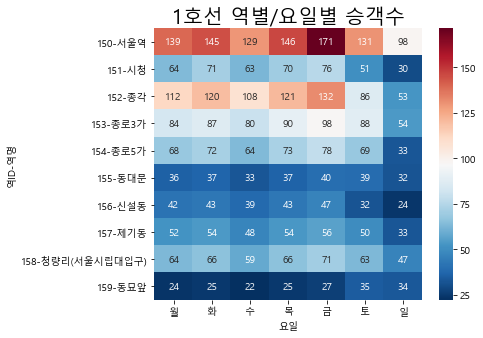

In [23]:
# 앞서 정리한 1호선의 역별/요일별 승객수를 히트맵을 이용해 표현하겠습니다. 
fig, ax = plt.subplots( figsize=(6,5) )   # 그래프 사이즈 지정
plt.title(f"{line} 역별/요일별 승객수", fontsize = 20) # for title
sns.heatmap(df_pivot, cmap = "RdBu_r", 
           annot = True, fmt = '.0f')

In [30]:
# 1호선 ~ 9호선 노선 리스트를 정리하겠습니다. 
line_seoul_list = [ ]
for line in raw['노선명'].unique():
    if line[1:] == '호선':    # x호선 인 경우를 선택합니다. 
        line_seoul_list.append(line)
line_seoul_list    

['2호선', '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '3호선', '1호선']

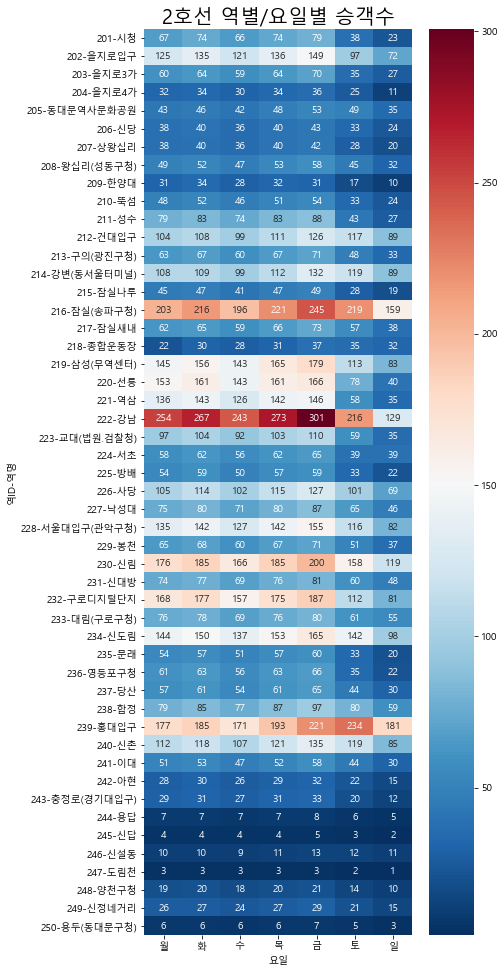

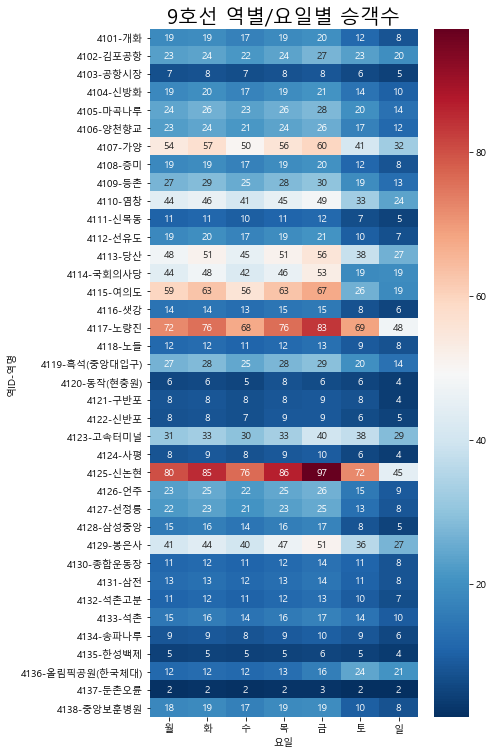

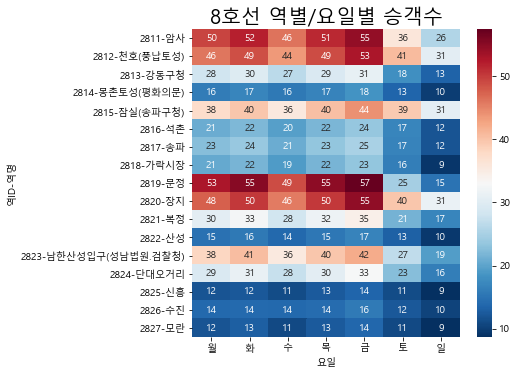

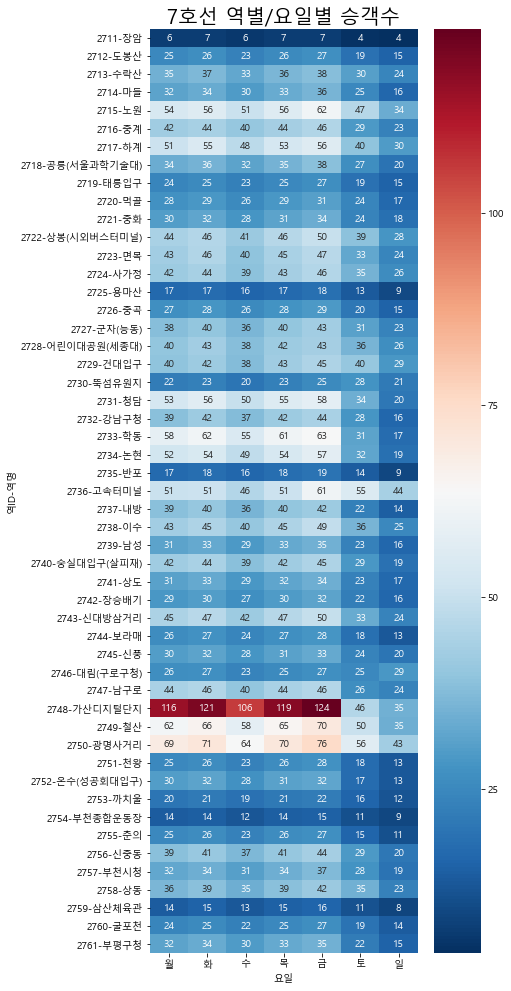

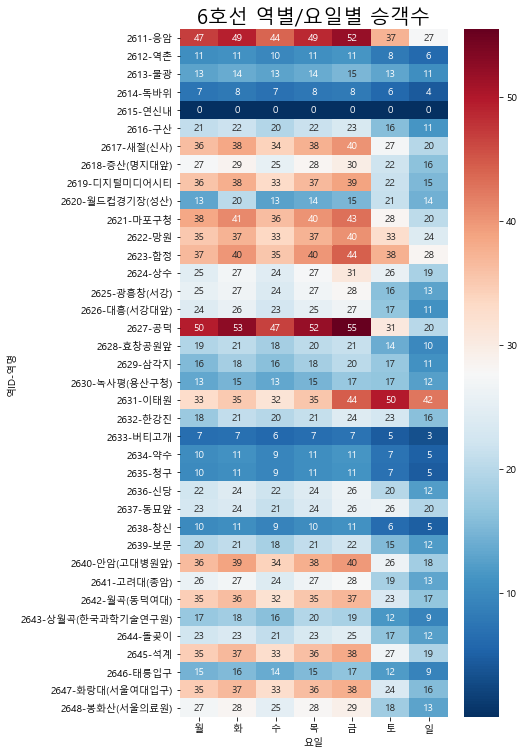

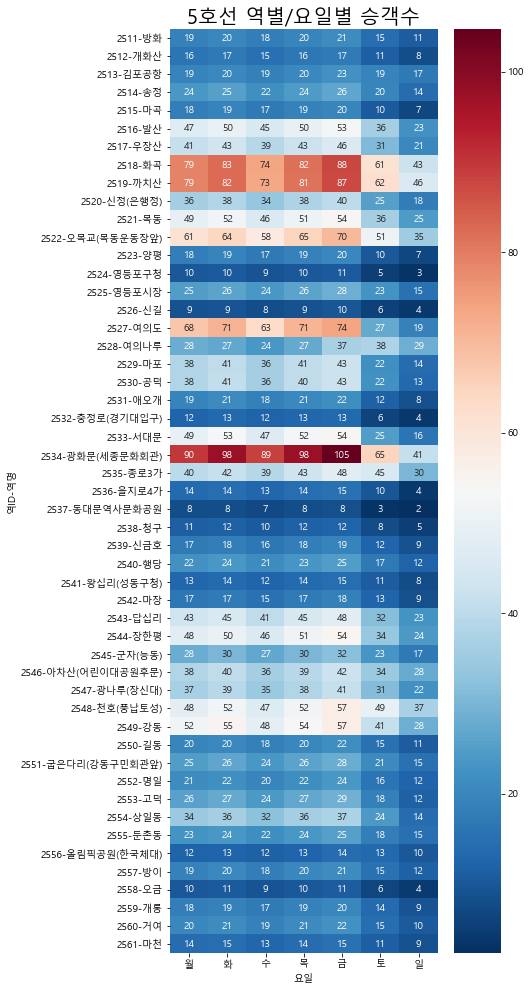

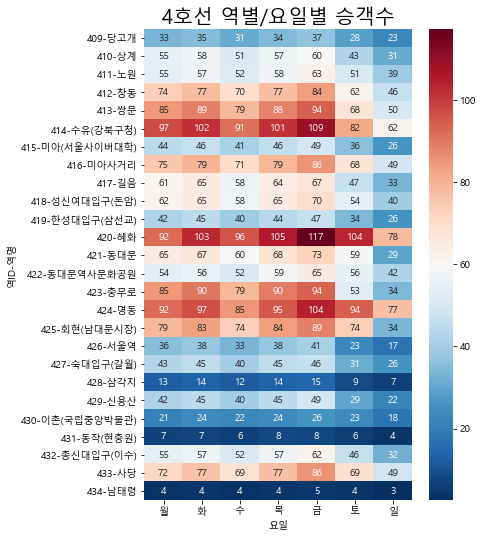

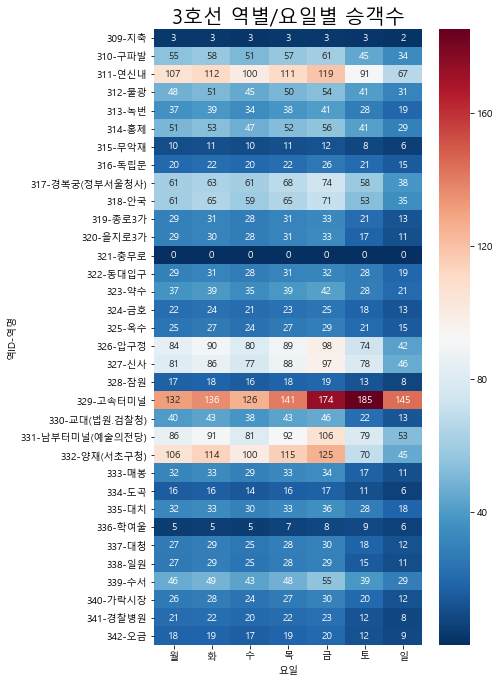

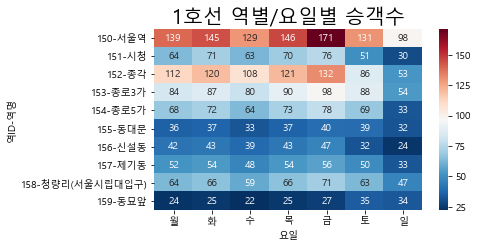

In [31]:
# 1~9호선의 노선별 승객수 데이터를 정리하겠습니다. 

for line in line_seoul_list:
    
    # 데이터 정리하기
    data_line = raw[raw['노선명'] == line]
    df_pivot = data_line.pivot_table(index = ['역ID', '역명'], columns = '요일', values = '승차총승객수',aggfunc = 'sum')
    df_pivot = df_pivot[['월','화','수','목','금','토','일']]
    df_pivot = df_pivot / 10000  # 만명단위로 수정
    
    
    # 그래프 그리기
    fig, ax = plt.subplots( figsize=(6,len(df_pivot)/3 ) )   # 그래프 사이즈를 조정하여, 역 수가 많은 경우는 세로를 길게 표현합니다. 
    plt.title(f"{line} 역별/요일별 승객수", fontsize = 20) # for title
    sns.heatmap(df_pivot, cmap = "RdBu_r", 
               annot = True, fmt = '.0f')